<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [195]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [196]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [197]:
# Answer: 
movies.shape


(979, 6)

#### Check the data type of each column.

In [198]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [199]:
# Answer:
movies.loc[:, 'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [200]:
# Answer:
movies.loc[:, 'duration'].sort_values()

389     64
338     66
258     67
293     68
88      68
742     69
351     70
938     75
405     75
303     76
713     78
864     78
489     78
535     79
513     80
853     80
533     80
283     80
297     80
622     80
117     81
541     81
738     81
789     81
330     81
595     82
306     82
174     83
759     83
766     83
      ... 
361    181
166    182
109    183
245    184
132    186
611    187
318    188
184    188
89     189
316    189
40     189
671    191
220    191
424    193
620    194
8      195
385    197
335    197
2      200
7      201
630    202
767    205
17     207
204    212
85     216
445    220
142    224
78     229
157    238
476    242
Name: duration, Length: 979, dtype: int64

#### Create a histogram of duration, choosing an "appropriate" number of bins.

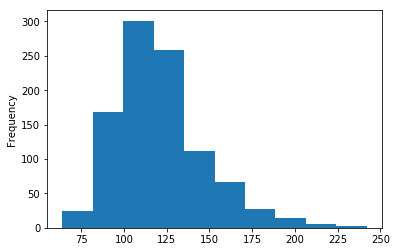

In [201]:
# Answer:

movies.loc[:, 'duration'].plot(kind='hist', bins=10)

#### Use a box plot to display that same data.

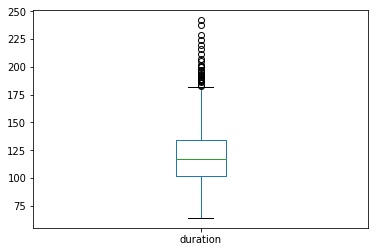

In [202]:
# Answer:
movies.loc[:, 'duration'].plot(kind='box')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [203]:
# Answer:
movies['content_rating'].value_counts()


R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

Text(0.5, 0, 'Content Rating')

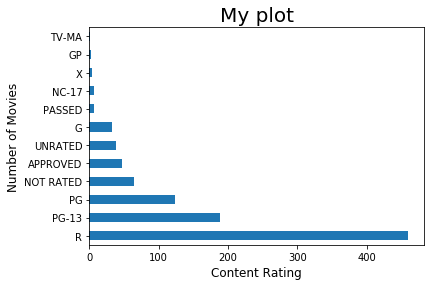

In [204]:
# Answer:

ax = movies.loc[:, 'content_rating'].value_counts().plot(kind='barh')
ax.set_title('My plot', fontsize=20, y=1)
ax.set_ylabel('Number of Movies', fontsize=12)
ax.set_xlabel('Content Rating', fontsize=12)


#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [205]:
# Answer:
movies.replace({'NOT RATED':'UNRATED', 'APPROVED':'UNRATED', 'PASSED':'UNRATED', 'GP':'UNRATED'}, inplace=True)
movies['content_rating'].value_counts()


R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [206]:
# Answer:

movies.replace({'X':'NC-17', 'TV-MA':'NC-17'}, inplace=True)
movies['content_rating'].value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [207]:
# Answer:

movies.isna().sum()


star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [334]:
# Answer:

movies.loc[:, 'content_rating_1'] = movies.loc[:, 'content_rating'].fillna(value='MISSING RATING')
#I found the missing values within content rating, and filled them with "missing rating"

movies['content_rating_1'].value_counts()

R                 460
PG-13             189
UNRATED           160
PG                123
G                  32
NC-17              12
MISSING RATING      3
Name: content_rating_1, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [209]:
# Answer:

movies.loc[:,'duration_greater_than_2hr'] = movies.loc[:, 'duration'].apply(lambda duration: duration >= 120)
#I created a new column for duration where less than 120 mins. is True and greater than 2 hours is false.

movies.groupby('duration_greater_than_2hr').agg({'star_rating':'mean'})
#I found the average star rating when duration was greater than 2 hours versus those with durations less than 2 hours.


,star_rating
duration_greater_than_2hr,
False,7.838667
True,7.948899


#### Use a visualization to detect whether there is a relationship between duration and star rating.

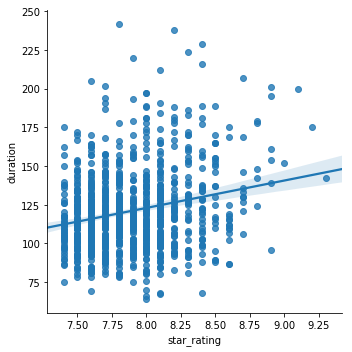

In [210]:
# Answer:

import seaborn as sns
sns.lmplot('star_rating', 'duration', data=movies)




#### Calculate the average duration for each genre.

In [211]:
# Answer:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

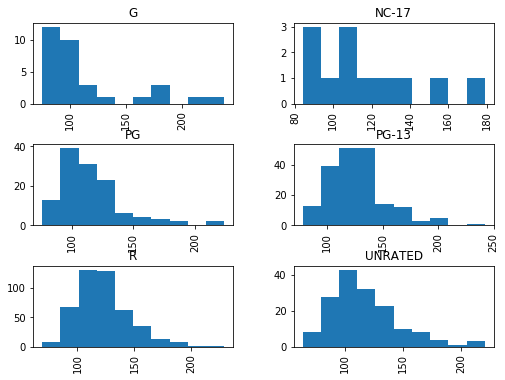

In [231]:
###### Answer:

ax = movies.hist(column='duration', by='content_rating', figsize=(8,6))


#### Find the title of the movie with the highest star rating in each genre

In [270]:
# Answer:

movies.groupby('genre')['star_rating'].max()
#This groups all genres by star rating from largest to smallest, with the largest at the top of the column

movies.groupby('genre')['title', 'star_rating'].first()
#I then grouped by genre and selected the top title and star rating for each genre


,title,star_rating
genre,,
Action,The Dark Knight,9.0
Adventure,The Lord of the Rings: The Return of the King,8.9
Animation,Spirited Away,8.6
Biography,Schindler's List,8.9
Comedy,Life Is Beautiful,8.6
Crime,The Shawshank Redemption,9.3
Drama,12 Angry Men,8.9
Family,E.T. the Extra-Terrestrial,7.9
Fantasy,The City of Lost Children,7.7


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [290]:
# Answer:

movies.duplicated(['title']).sum()
#Finding the number of duplicated titles

dupe_titles = movies[movies['title'].isin(movies[movies.duplicated(['title'])]['title'])]
#creating a variable the identifies each of the duplicated titles

dupe_titles.sort_values('title')
#sorting the duplicate titles, so all duplicate titles are near each other

#None of the movies are duplicates. They apear to be remakes of the same movie with different actors

,star_rating,title,content_rating,genre,duration,actors_list,content_rating_1,duration_greater_than_2hr
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",UNRATED,False
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",R,True
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",PG-13,True
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",PG-13,True
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",R,True
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",R,True
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",PG-13,False
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",MISSING RATING,True


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [295]:
# Answer:

relevant_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
#This creates a new object with the list of all genres manually

movies[movies['genre'].isin(relevant_genres)].groupby('genre').star_rating.mean()
#I grouped the relevant genres and found the means for each

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [321]:
# Answer:

relevant_genre = movies.genre.value_counts()
#This creates a listing of genres.

top_genres = relevant_genre[relevant_genre >= 5].index
#I created an object to filter on genres with at least five movies

movies[movies['genre'].isin(top_genres)].groupby('genre').star_rating.mean()
#I grouped the top genres and found the means

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [333]:
# Answer:

movies.sort_values('star_rating', ascending=False).groupby('genre')['star_rating'].first()
#I sorted by star rating, putting highest rated on top for each genre. Then requested the first movie rating for each genre

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [323]:
# Answer:
genre_ratings = movies.groupby('genre').star_rating.agg(['count', 'mean'])
#I created an object that groups genre and reports the aggregate count and mean for each genre

genre_ratings[genre_ratings['count'] >= 5]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [304]:
movies.dtypes

star_rating                  float64
title                         object
content_rating                object
genre                         object
duration                       int64
actors_list                   object
content_rating_1              object
duration_greater_than_2hr       bool
dtype: object